# Final code with Undersampling

In [1]:
# Data from statsbomb and using pandas dataframes
import statsbomb as sb
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix
#import scikitplot as skplt
 
# Machine learning
# scipy
import scipy as sp
# scikit-learn
import sklearn as sk

#Import Models 
from sklearn import preprocessing, model_selection, svm, metrics
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.utils import resample
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn import svm
#Import ROC, AUC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, ConfusionMatrixDisplay
from collections import Counter

In [2]:
# Get all competitions
competitions = sb.Competitions()
 
# Get json data
json_data = competitions.data
 
# Convert to dataframe
df = competitions.get_dataframe()

In [3]:
# Showing the competitions
# We will sieve out all the competitions (this runs from 2003 - 2020)
df

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-09T14:06:05.802
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2021-06-22T21:17:46.381,2021-06-13T16:17:31.694,None,2021-06-22T21:17:46.381
9,16,21,Europe,Champions League,male,False,False,2009/2010,2021-06-22T21:24:20.506,2021-06-13T16:17:31.694,None,2021-06-22T21:24:20.506


In [4]:
#The code to parse through them is commented out as it takes too long; instead we will load it from the csv 
#from which we had previously downloaded it to 


# Get all matches
#all_matches = pd.DataFrame()
#count = 0
#for i in range(len(df)):
#    comp_id = df.iloc[i]['competition_id']
#    season_id = df.iloc[i]['season_id']
#    if(str(comp_id) == '16' and str(season_id) == '76'): # this competition returns an error so we continue
#        continue
#    comp_df = sb.Matches(event_id = comp_id, season_id = season_id).get_dataframe()
#    print(comp_df)
#    print("---")
#    all_matches = all_matches.append(comp_df)
#    count += 1

In [5]:
#count # so 39 of the 40 competitions were extracted

In [6]:
#all_matches

In [7]:
#all_matches.to_csv('/Users/saejin123/Documents/all_matches.csv', index = False, header = True) # save csv

In [8]:
# But we want to focus on shots and goals
# Create a list of all match ids for the matches in the euros
#match_list = all_matches['match_id'].tolist()
 
# Create an empty dataframe to add all shots
#shots_df = pd.DataFrame()
 
# Loop through and add all shots from every match to the empty dataframe
'''for i in match_list:
    events = sb.Events(event_id=str(i))
    shot = events.get_dataframe(event_type='shot')
    shots_df = shots_df.append(shot)'''

#for i in match_list:
#    events = sb.Events(event_id=str(i))
#    shot = events.get_dataframe(event_type='shot')
#    shots_df = shots_df.append(shot)

"for i in match_list:\n    events = sb.Events(event_id=str(i))\n    shot = events.get_dataframe(event_type='shot')\n    shots_df = shots_df.append(shot)"

In [9]:
#shots_df.to_csv('/Users/saejin123/Documents/shots_df.csv', index = False, header = True) # oh definately save this csv

In [10]:
#Open shots_df csv which is basically the output saved to from the code above 
shots_df = pd.read_csv('/Users/hpone/Desktop/NUS MSBA/DBA5106/Term project/Updated code /shots_df.csv')

In [11]:
# Details on our data
print(len(shots_df), "is the total number of shots from every match from all the competitions provided except 1999/2000 mens Champions League")
print("--------------------")
 
print("Columns:")
print(list(shots_df))
print("--------------------")
 
print("Unique values:")
print(shots_df['type'].unique())
print("--------------------")
 
print("Unique values in the 'play_pattern' column:")
print(shots_df['play_pattern'].unique())

27741 is the total number of shots from every match from all the competitions provided except 1999/2000 mens Champions League
--------------------
Columns:
['event_type', 'id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 'possession_team', 'play_pattern', 'off_camera', 'team', 'player', 'position', 'duration', 'under_pressure', 'statsbomb_xg', 'key_pass_id', 'body_part', 'type', 'outcome', 'technique', 'first_time', 'follows_dribble', 'redirect', 'one_on_one', 'open_goal', 'deflected', 'start_location_x', 'start_location_y', 'end_location_x', 'end_location_y', 'end_location_z']
--------------------
Unique values:
['Penalty' 'Open Play' 'Free Kick' 'Corner' 'Kick Off']
--------------------
Unique values in the 'play_pattern' column:
['Other' 'Regular Play' 'From Throw In' 'From Keeper' 'From Corner'
 'From Counter' 'From Free Kick' 'From Goal Kick' 'From Kick Off']


In [12]:
# Remove penalties from the data since they are misleading in our analysis of shots
nopen_shots = shots_df[shots_df['type'] != 'Penalty']
#nopen_shots.to_csv('/Users/saejin123/Documents/npshots_df.csv', index = False, header = True) # oh definately save this csv too (this is the data we will use)

In [13]:
# Create a goal column, where 1 = goal and 0 = no goal
#Change outcome where goal = 1 
nopen_shots['goal'] = np.where(nopen_shots['outcome'] == 'Goal', 1, 0)

<ipython-input-13-964d82b6addc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nopen_shots['goal'] = np.where(nopen_shots['outcome'] == 'Goal', 1, 0)


In [14]:
# Show data
nopen_shots.head()

,event_type,id,index,period,timestamp,minute,second,possession,possession_team,play_pattern,...,redirect,one_on_one,open_goal,deflected,start_location_x,start_location_y,end_location_x,end_location_y,end_location_z,goal
1,shot,93adc671-0697-4ad0-8f30-6dea062f3b03,342,1,00:09:04.723,9,4,15,Tottenham Hotspur,Regular Play,...,NaN,NaN,NaN,NaN,91.9,43.1,120.0,46.5,5.2,0
2,shot,e18a3a5e-b587-43f3-8dea-a25a14517c14,587,1,00:16:48.573,16,48,25,Liverpool,From Throw In,...,NaN,NaN,NaN,NaN,90.2,59.3,120.0,34.7,0.8,0
3,shot,2439947c-b340-48a3-a8fe-b4e217136ccd,758,1,00:20:31.085,20,31,35,Liverpool,From Keeper,...,NaN,NaN,NaN,NaN,95.2,47.2,99.7,46.2,NaN,0
4,shot,7c1825a8-ff22-4d87-9a58-b287f0f3104a,768,1,00:21:53.381,21,53,37,Liverpool,From Throw In,...,NaN,NaN,NaN,NaN,113.0,59.5,113.2,0.1,NaN,0
5,shot,c678b67c-9658-4d7d-9a9b-d3db9a378829,1347,1,00:37:48.966,37,48,65,Liverpool,Regular Play,...,NaN,NaN,NaN,NaN,98.4,20.4,118.3,37.9,2.4,0


In [15]:
len(nopen_shots)

27289

In [16]:
nopen_shots.iloc[0]

event_type                                          shot
id                  93adc671-0697-4ad0-8f30-6dea062f3b03
index                                                342
period                                                 1
timestamp                                   00:09:04.723
minute                                                 9
second                                                 4
possession                                            15
possession_team                        Tottenham Hotspur
play_pattern                                Regular Play
off_camera                                           NaN
team                                   Tottenham Hotspur
player                                    Moussa Sissoko
position                        Right Defensive Midfield
duration                                        1.237037
under_pressure                                      True
statsbomb_xg                                    0.018768
key_pass_id                    

In [17]:
# Calculating average shot conversion rate
attempts = len(nopen_shots)
goals = sum(nopen_shots['goal'])
misses = attempts - goals
conversion_rate = goals / attempts
print('Average conversion rate: ',round(conversion_rate*100,2),"%")

Average conversion rate:  11.43 %


<AxesSubplot:xlabel='goal', ylabel='count'>

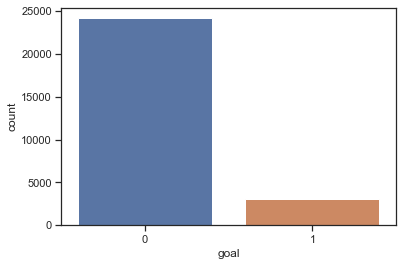

In [18]:
# Show graph
# We see that most shots end up not being being a goal
# Imbalanced dataset
sns.set(style="ticks", color_codes=True)
sns.countplot(x="goal", data=nopen_shots)

In [19]:
# Feature engineering - Make new variables out of the raw data to improve model
# Resetting index
nopen_shots = nopen_shots.reset_index().drop('level_0', axis=1)
 
# Our new variables: distance
# Length of soccer field is 120 units long and width is 80 units wide
# Use distance formula and angle from the centre of the goal being scored on ,at (120, 40), to location of shot
nopen_shots['x_distance'] = 120 - nopen_shots['start_location_x']
nopen_shots['y_distance'] = abs(40 - nopen_shots['start_location_y'])
nopen_shots['distance'] = np.sqrt((nopen_shots['x_distance']**2 + nopen_shots['y_distance']**2))

# If we know the player's weak and strong foot, we can make look at these data individually
nopen_shots['body_part'] = np.where((nopen_shots['body_part'] == 'Right Foot')
                                 | (nopen_shots['body_part'] == 'Left Foot'), 'foot',
                                np.where(nopen_shots['body_part'] == 'Head', 'head', 'other'))

#Calculate angle of shot 
# Value is provided from Statsbomb dataset a and b value are the two edges of the goalpost ;
#c is the difference 44-36 = 8
nopen_shots['a_value'] = np.sqrt(((nopen_shots['start_location_y']-36)**2 + (nopen_shots['start_location_x']-120)**2))
nopen_shots['b_value'] = np.sqrt(((nopen_shots['start_location_y']-44)**2 + (nopen_shots['start_location_x']-120)**2))
nopen_shots['shot_angle'] = np.arccos((nopen_shots['a_value']**2+nopen_shots['b_value']**2-8**2)/(2*nopen_shots['a_value']*nopen_shots['b_value']))

#Convert to degrees
nopen_shots['shot_angle'] = np.degrees(nopen_shots['shot_angle'])
#Round to 1 
nopen_shots['shot_angle'] = round(nopen_shots['shot_angle'],1)

/Users/hpone/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [20]:
# Find model features in cols
feature_cols = ['play_pattern', 'under_pressure', 'body_part', 'technique', 'first_time',
                'follows_dribble', 'redirect', 'one_on_one', 'open_goal', 'deflected', 'distance', 'shot_angle']


features = nopen_shots[feature_cols]
# Find model labels
labels = nopen_shots['goal']
 
# 0 to NA values
features = features.fillna(0)
labels = labels.fillna(0)

In [21]:
# Show features
# As you can see, we have the new variables of distance and angle and have filled up NA values with 0
# We have the relevant and useful information we need
features

,play_pattern,under_pressure,body_part,technique,first_time,follows_dribble,redirect,one_on_one,open_goal,deflected,distance,shot_angle
0,Regular Play,True,foot,Normal,0,0,0,0,0,0,28.270479,16.0
1,From Throw In,0,foot,Normal,0,0,0,0,0,0,35.503943,10.8
2,From Keeper,0,foot,Normal,0,0,0,0,0,0,25.824020,17.0
3,From Throw In,0,foot,Normal,0,0,0,0,0,0,20.718349,7.7
4,Regular Play,0,foot,Normal,0,0,0,0,0,0,29.167105,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...
27284,From Counter,0,foot,Normal,0,0,0,0,0,0,23.331095,16.6
27285,From Free Kick,0,foot,Normal,0,0,0,0,0,0,24.002708,18.7
27286,From Throw In,0,foot,Normal,0,0,0,0,0,0,26.622171,13.9
27287,From Throw In,True,foot,Half Volley,True,0,0,0,0,0,22.484884,15.6


In [22]:
# Label Encoding
# Make all categorical features to discrete values
cat_cols = ['play_pattern', 'under_pressure', 'body_part', 'technique', 'first_time',
                'follows_dribble', 'redirect', 'one_on_one', 'open_goal', 'deflected']
 
cat_features = features[cat_cols]
features = features.drop(cat_cols, axis=1)
features.head()



,distance,shot_angle
0,28.270479,16.0
1,35.503943,10.8
2,25.824020,17.0
3,20.718349,7.7
4,29.167105,11.7


In [23]:
# Discrete values for each category
le = preprocessing.LabelEncoder()
cat_features = cat_features.apply(le.fit_transform)

# Merge
features = features.merge(cat_features, left_index=True, right_index=True)

# Now we have turned all categorical features into discrete values, so we can work with a consistent dataset

#add in the xgstats - the benchmark xG to which we will compare - into features df
features['statsbomb_xg'] = nopen_shots['statsbomb_xg']
features.head()

,distance,shot_angle,play_pattern,under_pressure,body_part,technique,first_time,follows_dribble,redirect,one_on_one,open_goal,deflected,statsbomb_xg
0,28.270479,16.0,8,1,0,4,0,0,0,0,0,0,0.018768
1,35.503943,10.8,6,0,0,4,0,0,0,0,0,0,0.011494
2,25.824020,17.0,4,0,0,4,0,0,0,0,0,0,0.037931
3,20.718349,7.7,6,0,0,4,0,0,0,0,0,0,0.009835
4,29.167105,11.7,8,0,0,4,0,0,0,0,0,0,0.014247


In [24]:
#install the under sampler
#pip install -U imbalanced-learn

In [25]:
# X = model features, and y = labels
X_train_pre, X_test, y_train_pre, y_test = train_test_split(features, labels, test_size=0.20, shuffle=True, random_state=42)

#Import undersampler to balance out training dataset; test set remains untouched 
from imblearn.under_sampling import RandomUnderSampler
# summarize class distribution before undersampling
print("Before undersampling: ", Counter(y_train_pre))

# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 42)

# fit and apply the transform
X_train, y_train = undersample.fit_resample(X_train_pre, y_train_pre)

# summarize class distribution after undersampling
print("After undersampling: ", Counter(y_train))




#Extract out the xgstatsbomb 
xg_train = X_train.iloc[:,-1]
xg_test = X_test.iloc[:,-1]

#Drop the statsbomb after extracting so that it does not feature in the model training
X_train = X_train.drop(['statsbomb_xg'],axis=1)
X_test = X_test.drop(['statsbomb_xg'],axis=1)
#X_train = np.delete(X_train,12,axis=1)
#X_test = np.delete(X_test,12,axis=1)

#Drop statsbomb from features column too 
features = features.drop(['statsbomb_xg'],axis=1)


Before undersampling:  Counter({0: 19329, 1: 2502})
After undersampling:  Counter({0: 2502, 1: 2502})


In [26]:
y_train.value_counts()

0    2502
1    2502
Name: goal, dtype: int64

class 0: (2502,)
class 1: (2502,)
total class of 1 and0: 0    2502
1    2502
Name: goal, dtype: int64


<AxesSubplot:title={'center':'Count of goals and no goals '}>

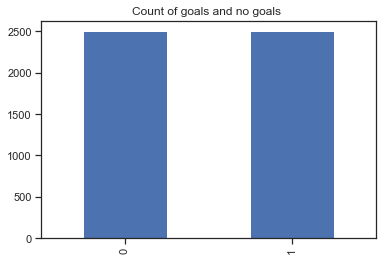

In [27]:
# class count after sampling
class_count_0, class_count_1 = y_train.value_counts()

# Separate class
class_0 = y_train[y_train == 0]
class_1 = y_train[y_train == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",y_train.value_counts())# plot the count after under-sampeling
y_train.value_counts().plot(kind='bar', title='Count of goals and no goals ')


In [28]:
X_train.shape

(5004, 12)

In [29]:
# cross validation with a bunch of models


# Algorithms
all_models = []
# liblinear has both L1 and L2 regularization
#     - Ridge Regression and Lasso Regression -> avoid overfitting and feature selection
# ovr means it's a binary problem for each label (one vs rest)
all_models.append(("LogReg",LogisticRegression(solver = "liblinear")))

# 
all_models.append(("DecisionTree",DecisionTreeClassifier()))

# maximizes seperation using our chosen features
#     - maximizing distance between means and minimizing variance 
#     - reduces features down 
#     - minimizes the scatter
all_models.append(("LDA",LinearDiscriminantAnalysis()))

# classification algorithm that memorizes observations to classify new data
#     - new data is classified by observing the "nearest neighbours"
all_models.append(("KNN", KNeighborsClassifier()))

# tree-like diagram where each leaf node is the outcome that is used to classify new data
#all_models.append(("CART",DecisionTreeClassifier()))

# Bagging with DecisionTreeClassifier
all_models.append(("Bagging_DTC", BaggingClassifier()))

#RandomForest
all_models.append(('Random Forest', RandomForestClassifier()))

# uses the Gaussian distribution to classify new data
all_models.append(("NB",GaussianNB()))

# uses a threshold that is the midpoint between different classifications
all_models.append(("SVM",SVC()))

all_models.append(("SVM-g",SVC(gamma = "auto")))


In [30]:
# evaluate each model
results = []
names = []
# go through each model and perform cross validation to compare different machine learning algorithms
#     - kind of like foiling through the n_splits and training and testing for each algorithm
for name, model in all_models:
    kfold = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True)
    cv_results = cross_val_score(model, X_train,y_train,cv=kfold, scoring = "accuracy") # evaluate score using cross validation
    results.append(cv_results)
    names.append(name)
    print("%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())) # take the mean and standard deviation

LogReg:0.700838(0.016362)
DecisionTree:0.612320(0.019414)
LDA:0.699243(0.019166)
KNN:0.643881(0.019069)
Bagging_DTC:0.654074(0.019360)
Random Forest:0.672264(0.025229)
NB:0.609306(0.018210)
SVM:0.664472(0.021153)
SVM-g:0.683255(0.020408)


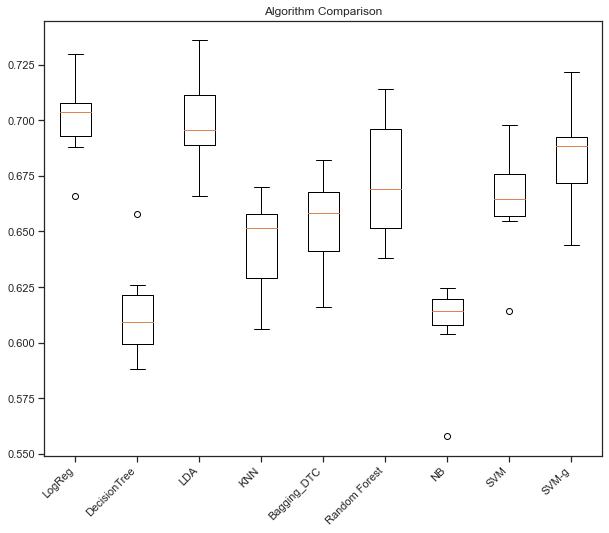

In [31]:
 # compare algorithms
plt.figure(figsize=(10,8))
plt.boxplot(results,labels = names)
plt.title("Algorithm Comparison")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light')
plt.show()
# best algorithm is Logistic Regression in terms of the mean

## Log Reg

In [32]:
#Try Gridsearch on logreg 
np.random.seed(42)
lr_1 = LogisticRegression(solver = "liblinear", random_state = 42)
#Using GridSearch

param_grids = {'penalty':['l1','l2'],'C':[0.005, 0.5, 1 , 5, 10, 25,  50 , 100, 400, 1000]}

lr_cv = GridSearchCV(lr_1,param_grids,cv=10)
lr_cv.fit(X_train,y_train)
print('Best params:',lr_cv.best_params_)

Best params: {'C': 1, 'penalty': 'l2'}


In [33]:
# best model - Logistic Regression
model_lr = LogisticRegression(penalty = 'l2',solver = "liblinear", random_state = 42, C=1, class_weight ='balanced')
model_lr.fit(X_train,y_train)
predictions = model_lr.predict(X_test)

0.7215097105166728
              precision    recall  f1-score   support

           0       0.95      0.73      0.82      4842
           1       0.24      0.69      0.36       616

    accuracy                           0.72      5458
   macro avg       0.60      0.71      0.59      5458
weighted avg       0.87      0.72      0.77      5458



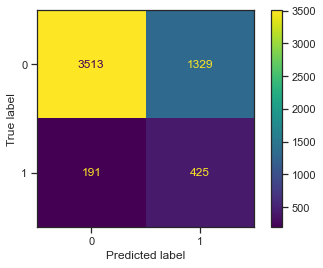

In [34]:

print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

con_matrix_1 = confusion_matrix(y_test,predictions,labels = model_lr.classes_)
display_1 = ConfusionMatrixDisplay(confusion_matrix=con_matrix_1, display_labels=model_lr.classes_)
display_1.plot()
plt.savefig('LogReg', dpi=600, format='png')
plt.show()


## LDA

In [35]:
#Try Gridsearch on LDA 
np.random.seed(42)
LDA_1 = LinearDiscriminantAnalysis()


#Using GridSearch
lda_param_grids = {'solver':['svd','lsqr','eigen']}

LDA_cv = GridSearchCV(LDA_1,lda_param_grids,cv=10)
LDA_cv.fit(X_train,y_train)
print('Best params:',LDA_cv.best_params_)

Best params: {'solver': 'svd'}


0.716196408941004
              precision    recall  f1-score   support

           0       0.95      0.72      0.82      4842
           1       0.24      0.69      0.36       616

    accuracy                           0.72      5458
   macro avg       0.59      0.71      0.59      5458
weighted avg       0.87      0.72      0.77      5458



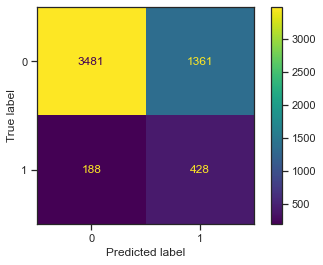

In [36]:
# LDA
model_lda = LinearDiscriminantAnalysis(solver = 'svd')
model_lda.fit(X_train,y_train)
predictions = model_lda.predict(X_test)
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

con_matrix_2 = confusion_matrix(y_test,predictions,labels = model_lda.classes_)
display_2 = ConfusionMatrixDisplay(confusion_matrix=con_matrix_2, display_labels=model_lda.classes_)
display_2.plot()
plt.show()

## kNN

In [37]:
#Try Gridsearch on kNN 
np.random.seed(42)
KNN_1 = KNeighborsClassifier()


#Using GridSearch
knn_param_grids = {'n_neighbors':[3,5,10,20],
                  'weights':['uniform', 'distance'],
                  'metric':['euclidean','manhattan','minkowski']}

KNN_cv = GridSearchCV(KNN_1,knn_param_grids,cv=10, n_jobs = -1)
KNN_cv.fit(X_train,y_train)
print('Best params:',KNN_cv.best_params_)

Best params: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}


0.7106998900696225
              precision    recall  f1-score   support

           0       0.94      0.72      0.81      4842
           1       0.23      0.65      0.34       616

    accuracy                           0.71      5458
   macro avg       0.58      0.68      0.58      5458
weighted avg       0.86      0.71      0.76      5458



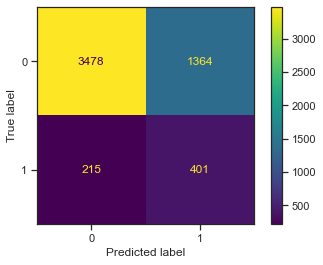

In [38]:
# KNN
model_knn = KNeighborsClassifier(metric = 'manhattan',n_neighbors=20)
model_knn.fit(X_train,y_train)
predictions = model_knn.predict(X_test)
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

con_matrix_3 = confusion_matrix(y_test,predictions,labels = model_knn.classes_)
display_3 = ConfusionMatrixDisplay(confusion_matrix=con_matrix_3, display_labels=model_knn.classes_)
display_3.plot()
plt.show()

## SVM

In [39]:

#This is from documentation
#The fit time scales at least quadratically with the number of samples 
#and may be impractical beyond tens of thousands of samples
#Given above, Extract subset of dataset to train on
#svc_x_train = X_train.iloc[:1000,:]
#svc_y_train = y_train.iloc[:1000]
from sklearn.svm import LinearSVC
#Using RandomizedSearch as GridSearch took too long and computationally expensive 
#RBF (default) will be used; parsing more kernels increases computation time; C and Gamma tuned instead
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)
svm_1 = SVC()
svm_param_grids = {'gamma':['scale','auto'],'C':[0.005,0.5,5,30,100,200,400]}
svm_cv = RandomizedSearchCV(svm_1,svm_param_grids,cv=10, n_jobs = -1)
svm_cv.fit(X_train,y_train)
print('Best params:',svm_cv.best_params_)




Best params: {'gamma': 'scale', 'C': 400}


0.7158299743495786
              precision    recall  f1-score   support

           0       0.95      0.72      0.82      4842
           1       0.24      0.72      0.36       616

    accuracy                           0.72      5458
   macro avg       0.60      0.72      0.59      5458
weighted avg       0.87      0.72      0.77      5458



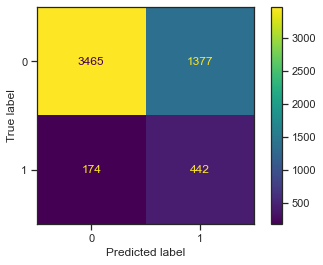

In [40]:
# SVM - gamma
model_svm = SVC(gamma = "scale", C=400)
model_svm.fit(X_train,y_train)
predictions = model_svm.predict(X_test)
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

con_matrix_4 = confusion_matrix(y_test,predictions,labels = model_svm.classes_)
display_4 = ConfusionMatrixDisplay(confusion_matrix=con_matrix_4, display_labels=model_svm.classes_)
display_4.plot()
plt.show()



## Bagging 

In [41]:
#Bagging
# Using the Decision Tree Model
clf = DecisionTreeClassifier(random_state=42)

#Using GridSearch
from sklearn.model_selection import GridSearchCV
depth = np.arange(30,42)
param_grids = {'criterion':['gini','entropy'],'max_depth':depth}

clf_cv = GridSearchCV(clf,param_grids, cv=10)
clf_cv.fit(X_train,y_train)
print('Best params:',clf_cv.best_params_)

Best params: {'criterion': 'entropy', 'max_depth': 34}


0.6791865152070355
              precision    recall  f1-score   support

           0       0.94      0.68      0.79      4842
           1       0.21      0.67      0.32       616

    accuracy                           0.68      5458
   macro avg       0.58      0.68      0.56      5458
weighted avg       0.86      0.68      0.74      5458



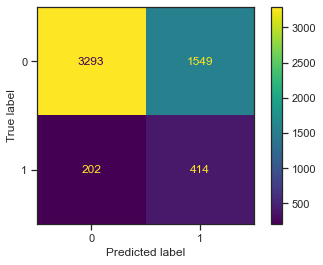

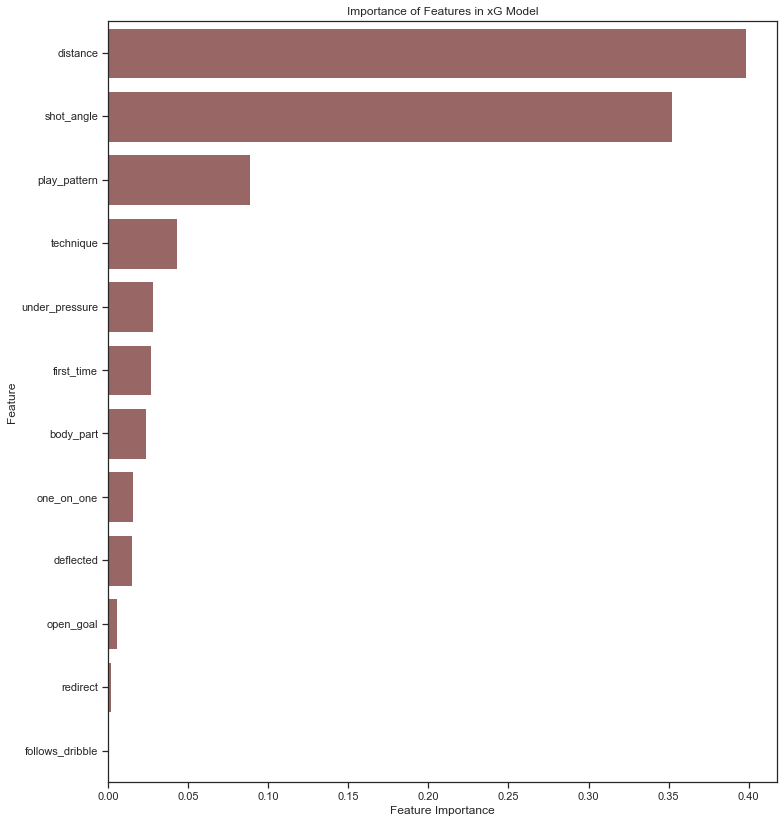

In [42]:
#Bagging
clf_bag = DecisionTreeClassifier(criterion = 'entropy', max_depth = 34, random_state=42)
bag_model=BaggingClassifier(base_estimator=clf_bag, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(X_train,y_train)
predictions = bag_model.predict(X_test)
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

con_matrix_5 = confusion_matrix(y_test,predictions,labels = bag_model.classes_)
display_5 = ConfusionMatrixDisplay(confusion_matrix=con_matrix_5, display_labels=bag_model.classes_)
display_5.plot()
plt.show()

#Get mean of feature importance amongst bagging
feature_importances = np.mean([
    tree.feature_importances_ for tree in bag_model.estimators_
], axis=0)
# Find the most important feature for goal
important_features = pd.DataFrame({'feature':features.columns,'importance':np.round(feature_importances,3)})
important_features = important_features.sort_values('importance',ascending=False)
 
f, ax = plt.subplots(figsize=(12, 14))
g = sns.barplot(x='importance', y='feature', data=important_features,
                color="red", saturation=.2, label="Total")
g.set(xlabel='Feature Importance', ylabel='Feature', title='Importance of Features in xG Model')
plt.savefig('Bagging importance', format='png')
plt.show()


## Random Forest

In [43]:
#Using RandomizedSearch for Random Forest
#from sklearn.model_selection import RandomizedSearchCV
#np.random.seed(42)
#number of estimators
num_est = np.arange(100,200)
#Max_depth
depth = np.arange(30,41)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

#Instantiate RF classifier 
clf_rf = RandomForestClassifier(random_state=42)
#Instantiate param_grids
param_grids = {'n_estimators':num_est,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'max_depth':depth}

clf_cv = RandomizedSearchCV(clf_rf,param_grids, cv =5,random_state=123)
clf_cv.fit(X_train,y_train)
print('Best params:',clf_cv.best_params_)

#Make it into list 
par = list(clf_cv.best_params_.values())

Best params: {'n_estimators': 182, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 33}


0.716196408941004
              precision    recall  f1-score   support

           0       0.95      0.72      0.82      4842
           1       0.24      0.72      0.36       616

    accuracy                           0.72      5458
   macro avg       0.60      0.72      0.59      5458
weighted avg       0.87      0.72      0.77      5458



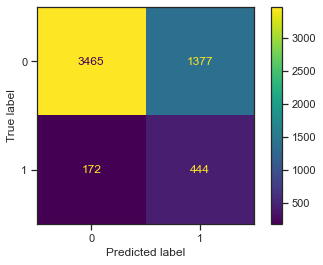

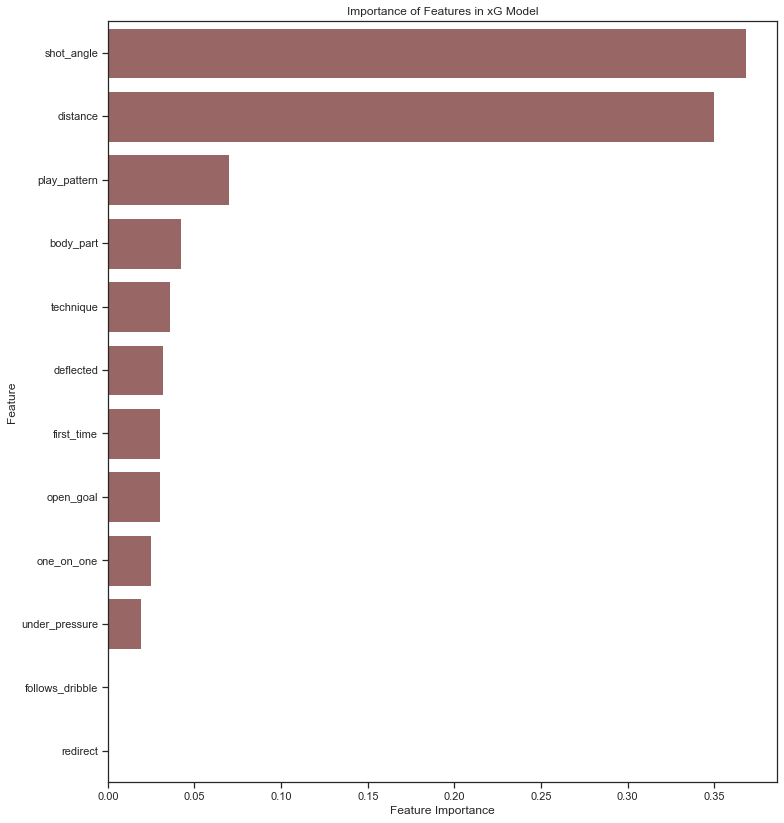

In [44]:
#Random Forest

RF_final = RandomForestClassifier(n_estimators = par[0],
                                  min_samples_split = par[1],
                                  min_samples_leaf = par[2],  
                                  max_depth = par[3], 
                                   random_state=42)

RF_final.fit(X_train, y_train)
predictions = RF_final.predict(X_test)
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

con_matrix_6 = confusion_matrix(y_test,predictions,labels = RF_final.classes_)
display_6 = ConfusionMatrixDisplay(confusion_matrix=con_matrix_6, display_labels=RF_final.classes_)
display_6.plot()
plt.show()

# Find the most important feature for goal with RF
important_features = pd.DataFrame({'feature':features.columns,'importance':np.round(RF_final.feature_importances_,3)})
important_features = important_features.sort_values('importance',ascending=False)
 
f, ax = plt.subplots(figsize=(12, 14))
g = sns.barplot(x='importance', y='feature', data=important_features,
                color="red", saturation=.2, label="Total")
g.set(xlabel='Feature Importance', ylabel='Feature', title='Importance of Features in xG Model')
plt.savefig('RF importance', format='png')
plt.show()


## AUC

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.774
LDA: ROC AUC=0.773
KNN: ROC AUC=0.751
SVM: ROC AUC=0.780
Bagging: ROC AUC=0.739
RF: ROC AUC=0.782
Statsbomb: ROC AUC=0.810


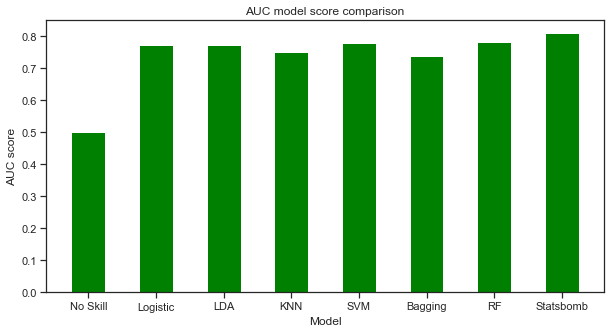

In [45]:
# auc score for these algorithms

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))] # no skill prediction (all 0s)
auc_ns = roc_auc_score(y_test, ns_probs)

# logreg
pred_score_lr = model_lr.predict_proba(X_test)
pred_score_lr = pred_score_lr[:,1]
auc_lr = roc_auc_score(y_test, pred_score_lr)

# LDA
pred_score_lda = model_lda.decision_function(X_test)
auc_lda = roc_auc_score(y_test, pred_score_lda)

# KNN
pred_score_knn = model_knn.predict_proba(X_test)
pred_score_knn = pred_score_knn[:,1]
auc_knn = roc_auc_score(y_test, pred_score_knn)

# SVM gamma
pred_score_svm = model_svm.decision_function(X_test)
auc_svm = roc_auc_score(y_test, pred_score_svm)

#Bagging
pred_score_bagging = bag_model.predict_proba(X_test)
#print(pred_score_bagging)
pred_score_bagging = pred_score_bagging[:,1]
auc_bag = roc_auc_score(y_test, pred_score_bagging)

#RF
pred_score_RF = RF_final.predict_proba(X_test)
pred_score_RF = pred_score_RF[:,1]
auc_RF = roc_auc_score(y_test, pred_score_RF)

#of statsbomb's model
auc_stats = roc_auc_score(y_test, xg_test)



# summarize scores
print('No Skill: ROC AUC=%.3f' % (auc_ns))
print('Logistic: ROC AUC=%.3f' % (auc_lr))
print('LDA: ROC AUC=%.3f' % (auc_lda))
print('KNN: ROC AUC=%.3f' % (auc_knn))
print('SVM: ROC AUC=%.3f' % (auc_svm))
print('Bagging: ROC AUC=%.3f' % (auc_bag))
print('RF: ROC AUC=%.3f' % (auc_RF))
print('Statsbomb: ROC AUC=%.3f' % (auc_stats))

#Plotting the scores on graph 
# Dataset generation
data_dict = {'No Skill':auc_ns, 
             'Logistic':auc_lr,
             'LDA':auc_lda,
             'KNN':auc_knn,
             'SVM':auc_svm,
             'Bagging':auc_bag,
             'RF':auc_RF,
             'Statsbomb':auc_stats}

names = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(names, values, color ='green',
        width = 0.5)
plt.xlabel("Model")
plt.ylabel("AUC score")
plt.title("AUC model score comparison")
plt.show()

## ROC

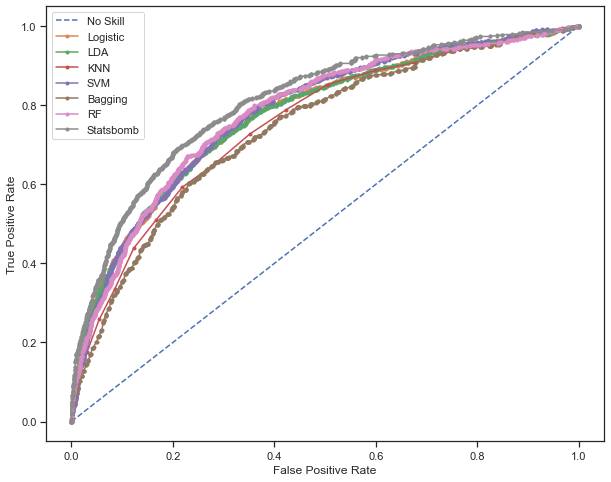

In [46]:
plt.figure(figsize=(10,8))
#Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred_score_lr)
lda_fpr, lda_tpr, _ = roc_curve(y_test, pred_score_lda)
knn_fpr, knn_tpr, _ = roc_curve(y_test, pred_score_knn)
svm_fpr, svm_tpr, _ = roc_curve(y_test, pred_score_svm)
bag_fpr, bag_tpr, _ = roc_curve(y_test, pred_score_bagging)
rf_fpr, rf_tpr, _ = roc_curve(y_test, pred_score_RF)
xg_fpr, xg_tpr, _ = roc_curve(y_test, xg_test)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(lda_fpr, lda_tpr, marker='.', label='LDA')
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
plt.plot(bag_fpr, bag_tpr, marker='.', label='Bagging')
plt.plot(rf_fpr, rf_tpr, marker='.', label='RF')
plt.plot(xg_fpr, xg_tpr, marker='.', label='Statsbomb')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

# show the plot
plt.show()